In [2]:
import pandas as pd

df = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/Credit risk and loan default prediction/credit-risk-analysis-and-loan-default-prediction/data/processed/loan_credit_approval_engineered_scale.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('default', axis = 1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight = 'balanced', max_iter = 1000, random_state = 2)

In [8]:
#create parameters of grid search cv

from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'penalty': ['l2']
}

lr_model = GridSearchCV(estimator = lr,
                        param_grid = param_grid_lr,
                        cv = 3,
                        scoring = 'f1',
                        n_jobs = -1,
                        verbose = 1)

lr_model.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=2),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'penalty': ['l2']},
             scoring='f1', verbose=1)

F1 Score: 0.4222457882738432
ROC-AUC Score: 0.7133345926956693
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74    204097
           1       0.31      0.67      0.42     49260

    accuracy                           0.64    253357
   macro avg       0.60      0.65      0.58    253357
weighted avg       0.78      0.64      0.68    253357



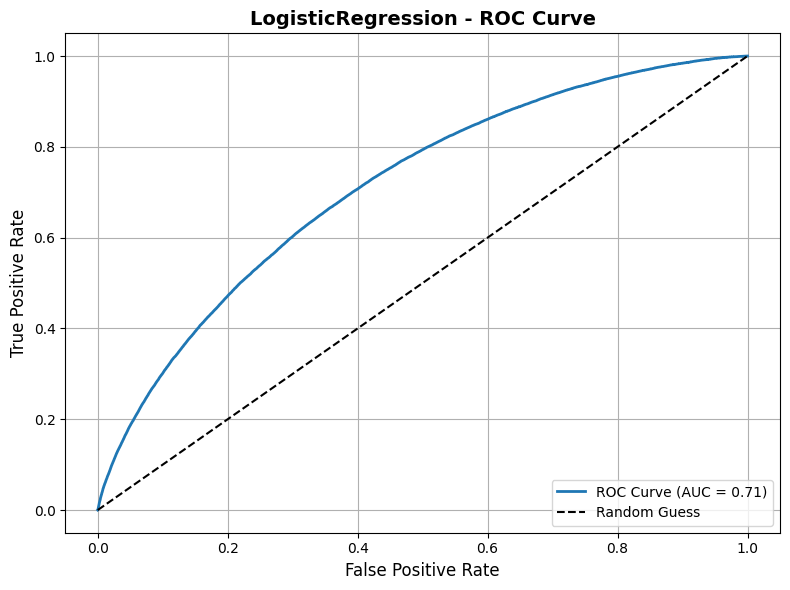

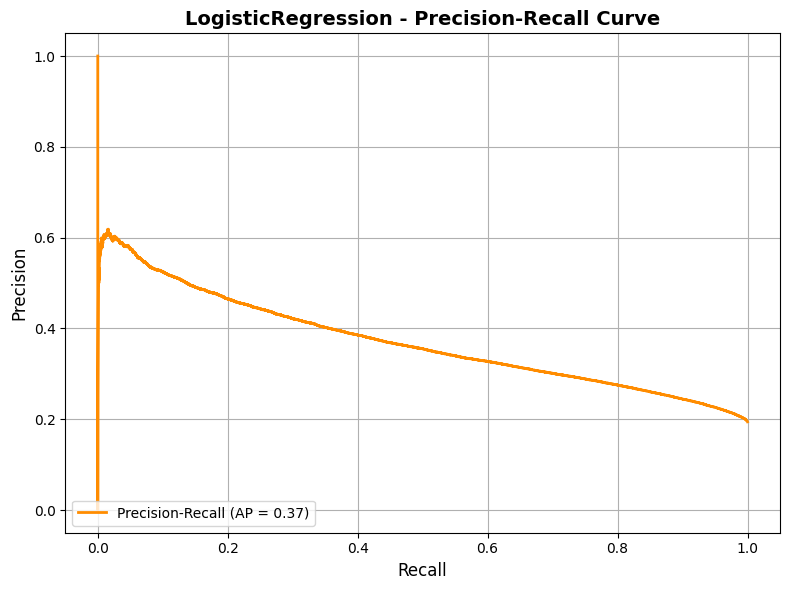

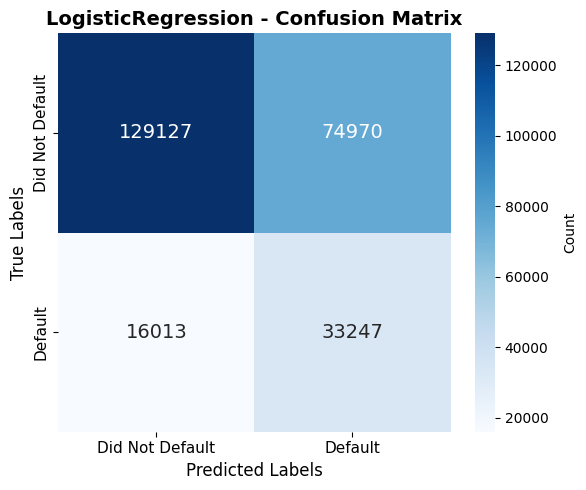

In [11]:
# apply evaluation method

import sys
sys.path.append('/Users/anhnguyendo/Documents/Python machine learning/Credit risk and loan default prediction/credit-risk-analysis-and-loan-default-prediction/script')

from metrics_calculation import evaluation

results = evaluation(
    model=lr_model.best_estimator_,
    X_test=X_test,
    y_test=y_test,
    model_name="LogisticRegression"
)

The logistic regression model shows moderate performance, with an ROC-AUC of 0.71 and an F1 score of 0.42 for predicting loan defaults. The confusion matrix reveals a high number of false positives (74,970), indicating the model frequently predicts defaults incorrectly. While the model captures 67% of actual defaulters (recall), its precision for the default class is low (0.31), suggesting many of those flagged as high risk were actually safe. The Precision-Recall AUC is 0.37, reflecting the challenge of distinguishing defaults in an imbalanced dataset.

To improve, we can try more powerful models like Random Forest or XGBoost, which handle class imbalance and nonlinearities better. Feature engineering—such as creating interaction terms or risk-based ratios—may also boost performance.